# Zomato Restaurant

# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


# TABLE OF CONTENT:

# IMPORING NECESSARY LIBRARIES

In [60]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Treatment, Peprocessor, Scaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Evaluation & Metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Saving Model
import joblib

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# IMPORING DATASET FROM TWO DIFFERNET FILES AND MERGING THEM INTO ONE DATA

In [61]:
# Loading Dataset
df1 = pd.read_excel("C:/Users/Sayan Mondal/Downloads/Country-Code.xlsx")

df2 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv", encoding='latin1')


In [62]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [63]:
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [64]:
# Loading the entire dataset
df = pd.merge(df2, df1,how='left',on='Country Code')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


# EXTRAPLOTARY DATA ANALYSIS

In [65]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [66]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [67]:
df.shape

(9551, 22)

In [68]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [69]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [70]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [72]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [73]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [74]:
for col in df.columns:
    frequencies = df[col].unique()
    print(f"Unique values in column {col}:")
    print(frequencies)
    print("\n")

Unique values in column Restaurant ID:
[6317637 6304287 6300002 ... 5915807 5916112 5927402]


Unique values in column Restaurant Name:
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]


Unique values in column Country Code:
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


Unique values in column City:
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'M

In [75]:
for col in df.columns:
    frequencies = df[col].value_counts()
    print(f"Unique values in column {col}:")
    print(frequencies)
    print("\n")

Unique values in column Restaurant ID:
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Unique values in column Restaurant Name:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


Unique values in column Country Code:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


Unique values in column City:
New Delhi           5473
Gurgaon        

# CHECHKING FOR DUPLICATE VALUES

In [76]:
df.duplicated().sum()

0

# CHECKING FOR ANY NULL VALUES

In [77]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# TREATING THE NULL VALUES

AS THERE ARE ONLY 9 NULL VALUES IN CUISINE COLUMN THUS IT WOULD BE BETTER TO REPACE IT SIMPLY BY APPLYING MODE AND REPLACING IT RATHER THAN USING ANY OTHER METHOD

In [78]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [79]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# REMOVING IRREVALENT COLUMNS

In [80]:
# Dropping redundant columns
df.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude','Switch to order menu' ], axis=1, inplace=True)

# Checking Dimesion of the Dataframe
df.shape

(9551, 16)

FEW IRRELEVANT COLUMNS ['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude','Switch to order menu' ]ARE REMOVED TO CLEAN AS THEY HAD NO IMPACT ON OUR TARGET AND WERE MERE ADDITIONAL INFORMATION AND MAKE THE DATA MORE RELIABLE FOR MODELLIMG

In [81]:
# Separating Numerical & Categorical columns from the entire dataset
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64']).columns
print('Separating Numerical & Categorical columns from the entire dataset:','\n')
print('Categorical columns are: ',categorical_columns)
print('\n')
print('Numerical_columns are: ',numerical_columns)

Separating Numerical & Categorical columns from the entire dataset: 

Categorical columns are:  Index(['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text', 'Country'],
      dtype='object')


Numerical_columns are:  Index(['Country Code', 'Average Cost for two', 'Price range', 'Votes'], dtype='object')


In [82]:
for col in numerical_columns:
    print(f"Minimum Capacity of {col}:", df[col].min())
    print(f"Maximum Capacity of {col}:", df[col].max())
    print('='*50)

Minimum Capacity of Country Code: 1
Maximum Capacity of Country Code: 216
Minimum Capacity of Average Cost for two: 0
Maximum Capacity of Average Cost for two: 800000
Minimum Capacity of Price range: 1
Maximum Capacity of Price range: 4
Minimum Capacity of Votes: 0
Maximum Capacity of Votes: 10934


# DATA VISUALIZATION

UNIVARIATE ANALYSIS THROUGH DATA VISUALIZATION

In [83]:
for col in categorical_columns:
    print(f"**Frequency table for {col}:**")
    print(df[col].value_counts())
    print()


**Frequency table for Restaurant Name:**
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

**Frequency table for City:**
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

**Frequency table for Locality:**
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                      

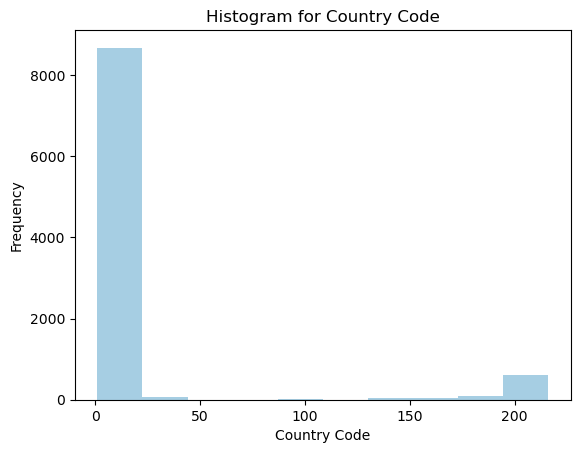

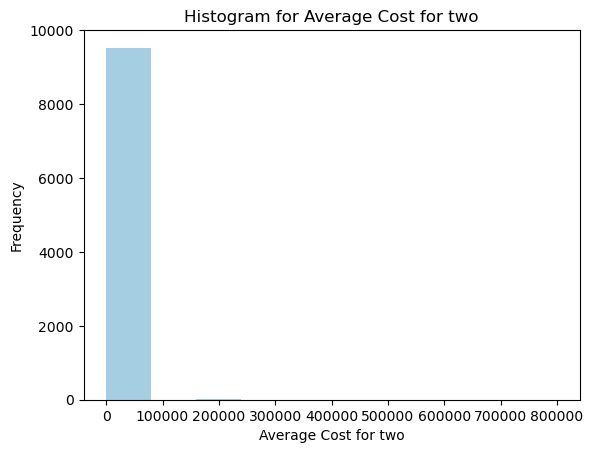

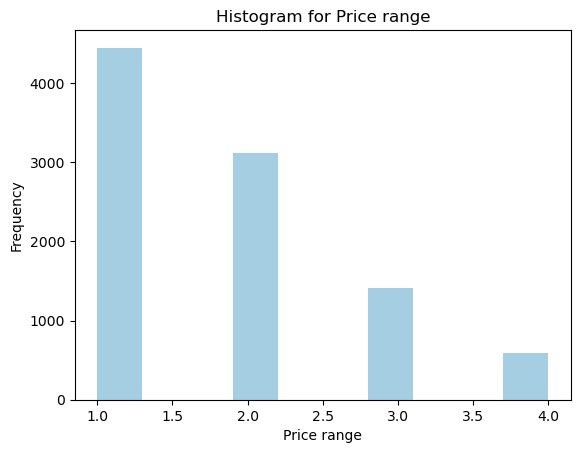

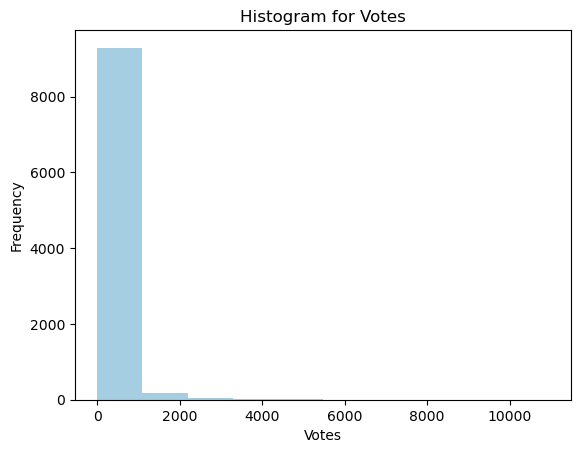

In [84]:
for col in numerical_columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {col}")
    plt.show()


In [85]:
restaurant_counts = df['Restaurant Name'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each restaurant
percentage_per_restaurant = (restaurant_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': restaurant_counts, 'Percentage': percentage_per_restaurant})
result_df.head(10)


,Count,Percentage
Cafe Coffee Day,83,0.869019
Domino's Pizza,79,0.827139
Subway,63,0.659617
Green Chick Chop,51,0.533975
McDonald's,48,0.502565
Keventers,34,0.355984
Pizza Hut,30,0.314103
Giani,29,0.303633
Baskin Robbins,28,0.293163
Barbeque Nation,26,0.272223


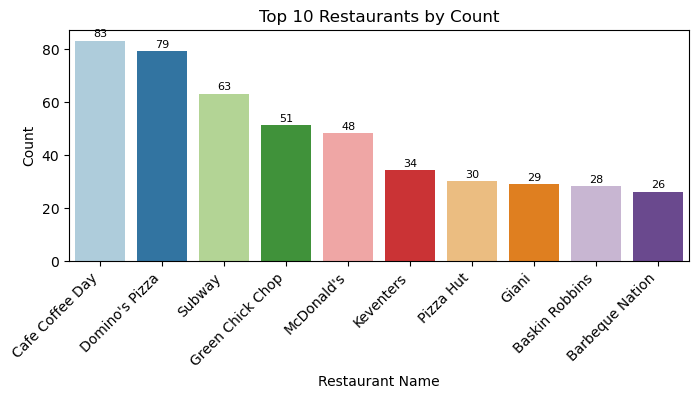

In [86]:
top_10_restaurants = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_10_restaurants.index, y='Count', data=top_10_restaurants, palette='Paired')
plt.title('Top 10 Restaurants by Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [87]:
locality_counts = df['Locality'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each Locality
percentage_per_city = (locality_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': locality_counts, 'Percentage': percentage_per_city})
result_df.head(10)

,Count,Percentage
Connaught Place,122,1.277353
Rajouri Garden,99,1.036541
Shahdara,87,0.910899
Defence Colony,86,0.900429
Malviya Nagar,85,0.889959
Pitampura,85,0.889959
Mayur Vihar Phase 1,84,0.879489
Rajinder Nagar,81,0.848079
Safdarjung,80,0.837609
Satyaniketan,79,0.827139


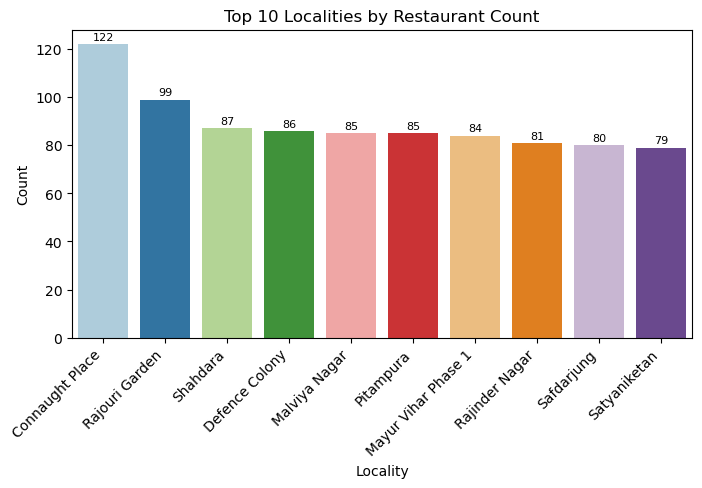

In [88]:
# Top 10 localities
top_10_localities = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_10_localities.index, y='Count', data=top_10_localities)
plt.title('Top 10 Localities by Restaurant Count')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

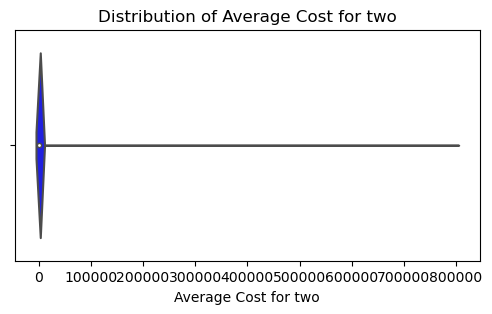

In [89]:
# Visualizing It
plt.figure(figsize=(6,3))
sns.violinplot(x='Average Cost for two', data=df, color='blue')
plt.title('Distribution of Average Cost for two')
plt.show()

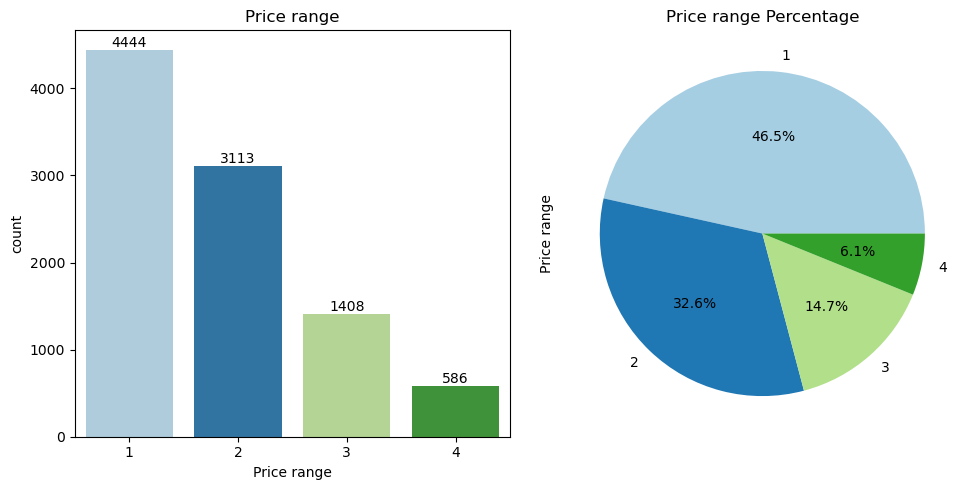

In [90]:
#Visualizing it
fig,axes =plt.subplots(1,2, figsize=(10,5))
sns.set_palette("Paired")

# First plot: Count Plot
ax = sns.countplot(x='Price range', data=df, ax=axes[0])
for container in ax.containers:
        ax.bar_label(container)
axes[0].set_title("Price range")

# Second Plot: Percentage count
df['Price range'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Price range Percentage")

plt.tight_layout()
plt.show()

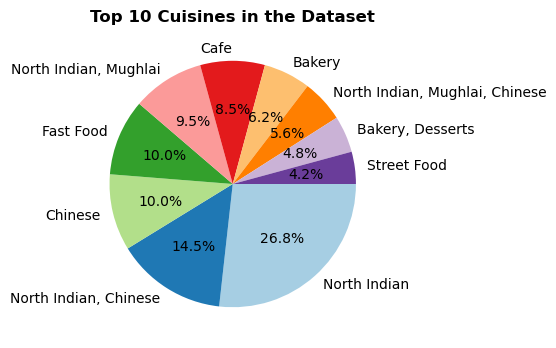

In [91]:
# Top 10 cuisines
top_10_cuisines = df['Cuisines'].value_counts().sort_values(ascending=False)[:10]

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_10_cuisines, labels=top_10_cuisines.index, autopct='%1.1f%%', counterclock=False)
plt.title('Top 10 Cuisines in the Dataset', fontweight='bold')
plt.show()

# BIVARIATE ANALYSIS THROUGH DATA VISUALIZATION

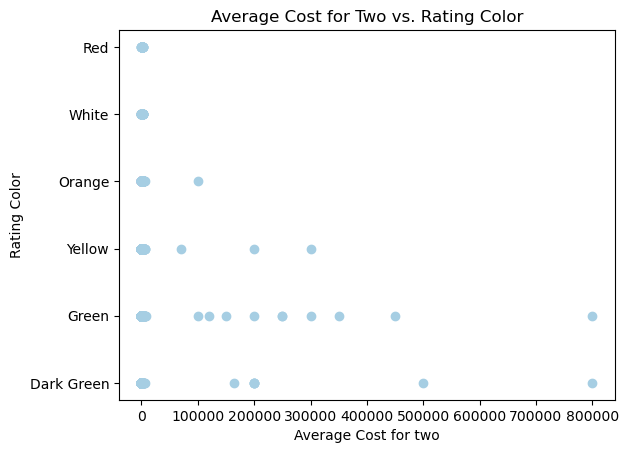

In [92]:
# Example: Scatter plot between "Average Cost for two" and "Rating color"
plt.scatter(df["Average Cost for two"], df["Rating color"])
plt.xlabel("Average Cost for two")
plt.ylabel("Rating Color")
plt.title("Average Cost for Two vs. Rating Color")
plt.show()


<Axes: xlabel='Price range', ylabel='Average Cost for two'>

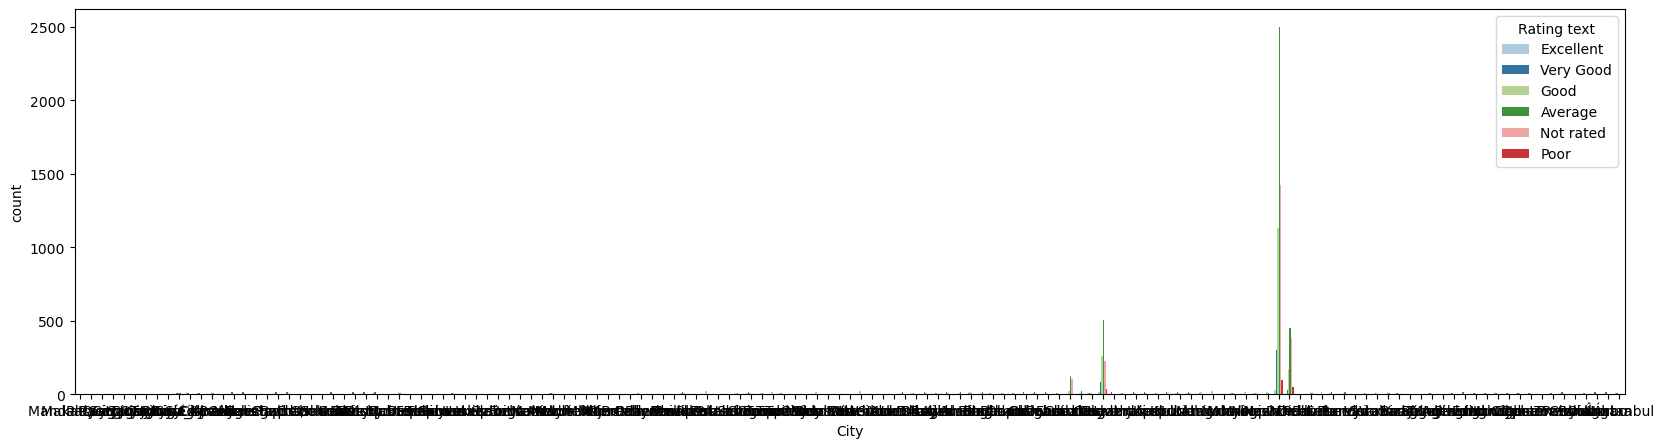

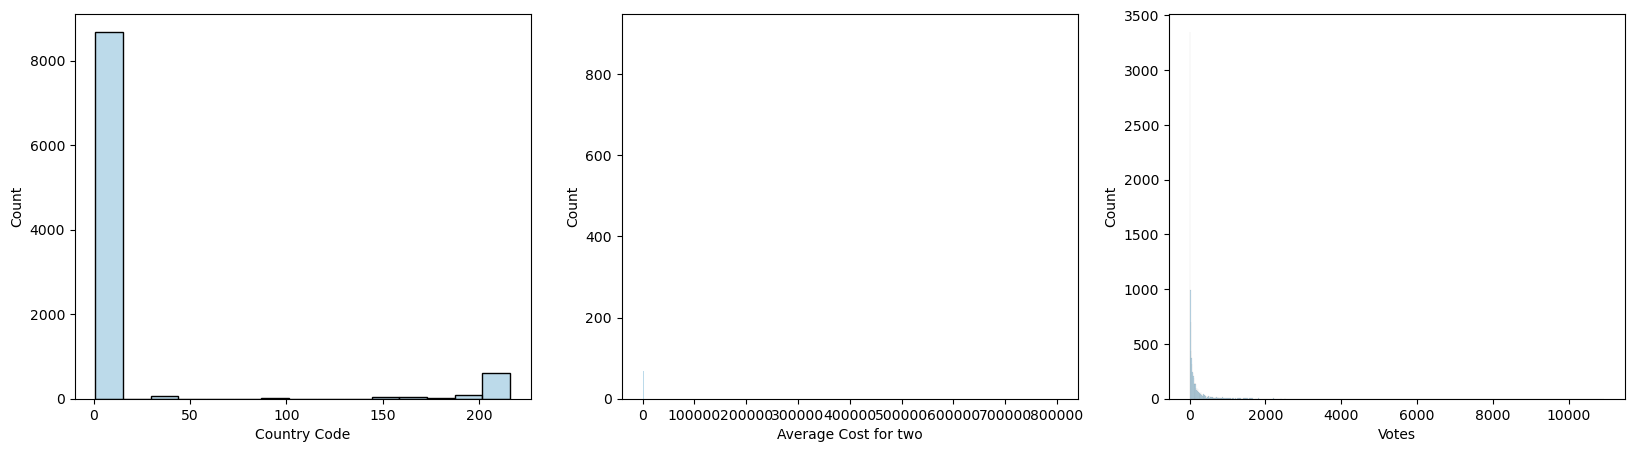

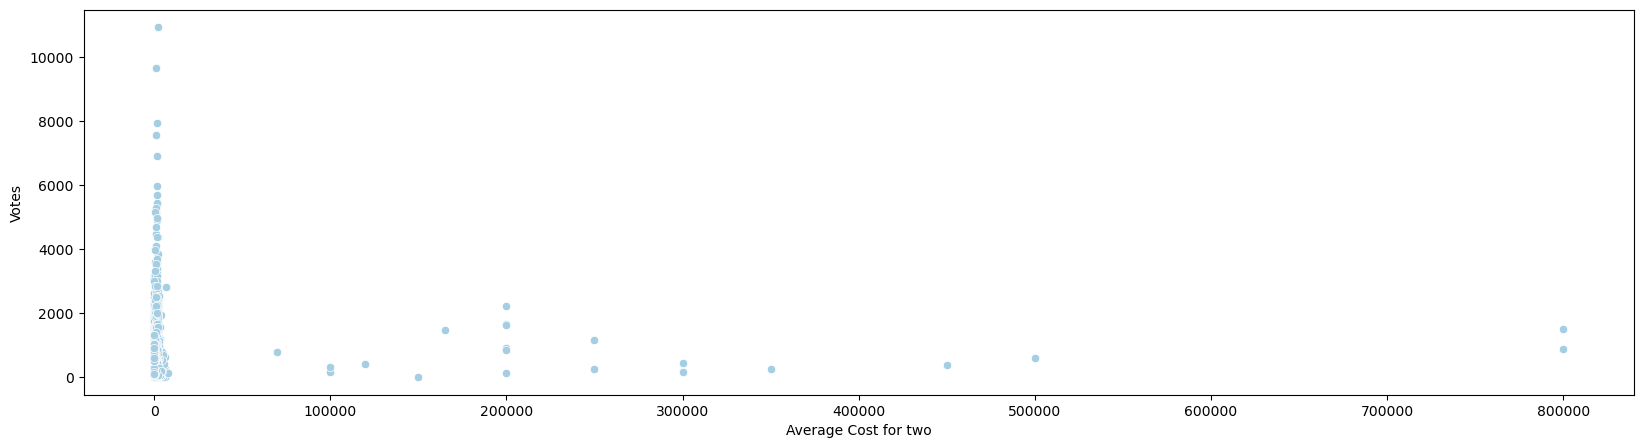

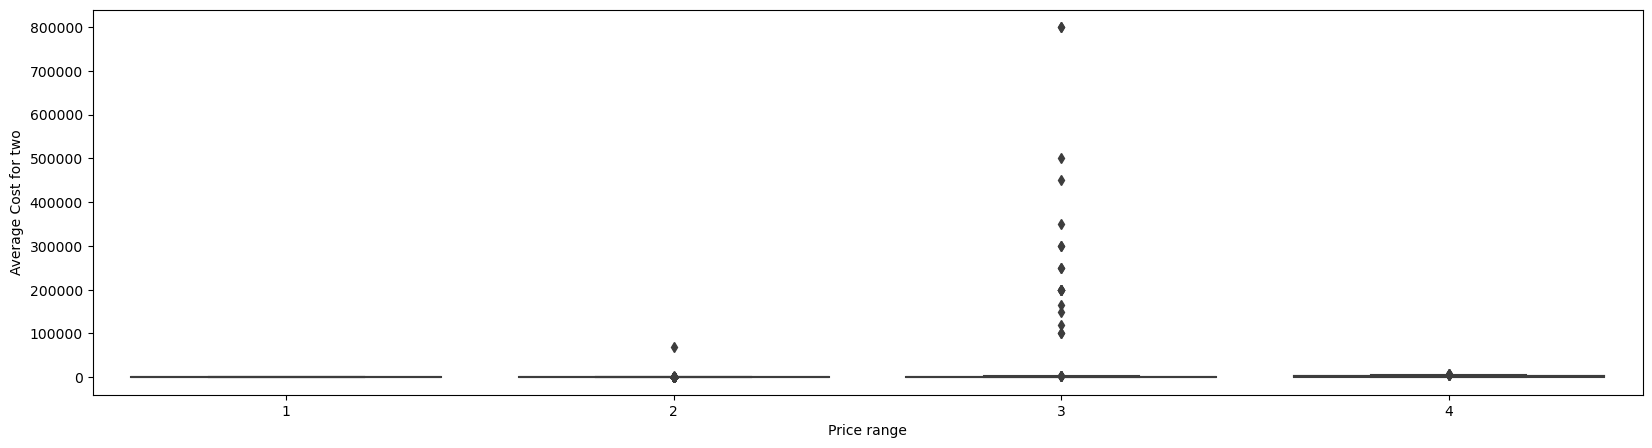

In [93]:
# Bivariate analysis of categorical columns
plt.figure(figsize=(20, 5))
sns.countplot(x='City', hue='Rating text', data=df)
#plt.figure(figsize=(20, 5))
#sns.countplot(x='Cuisine', hue='Rating text', data=df)

# Univariate analysis of numerical columns
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Country Code'])
plt.subplot(1, 3, 2)
sns.histplot(df['Average Cost for two'])
plt.subplot(1, 3, 3)
sns.histplot(df['Votes'])

# Bivariate analysis of numerical columns
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Average Cost for two', y='Votes', data=df)
plt.figure(figsize=(20, 5))
sns.boxplot(x='Price range', y='Average Cost for two', data=df)

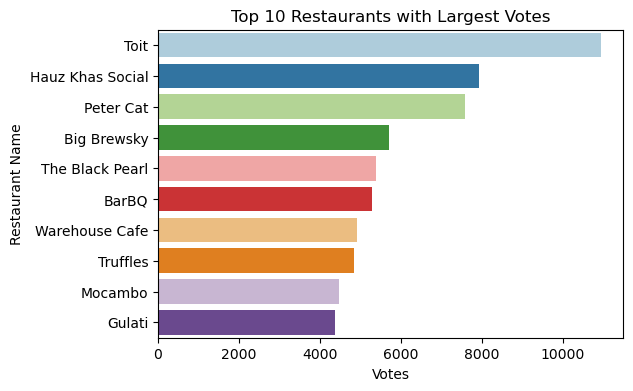

In [94]:
top_votes = df.groupby('Restaurant Name')['Votes'].agg(['mean', 'count']).nlargest(10, 'mean')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# Bar plot for top 10 restaurants with largest Votes
bars = sns.barplot(x=top_votes['mean'], y=top_votes.index, palette='Paired', ax=ax)
ax.set(xlabel='Votes', ylabel='Restaurant Name', title='Top 10 Restaurants with Largest Votes')

# Show the plot
plt.show()

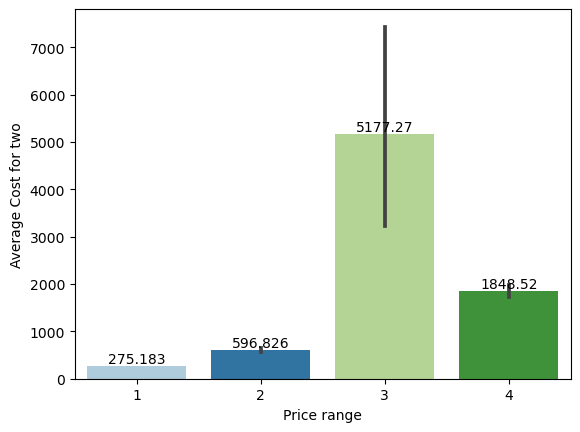

In [95]:
# Visualizing it using barplot
ax=sns.barplot(x='Price range',y='Average Cost for two',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

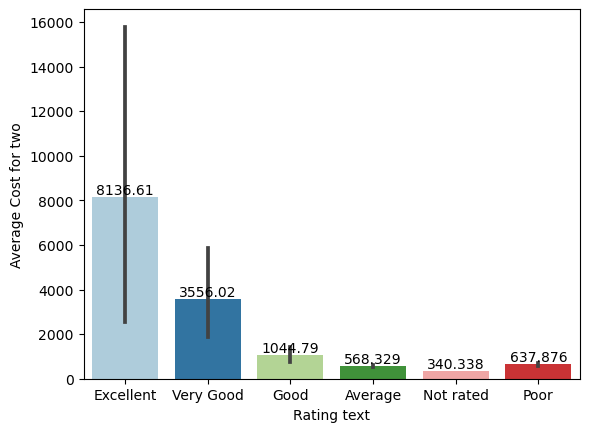

In [96]:
#visualizing it
ax=sns.barplot(x='Rating text',y='Average Cost for two',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

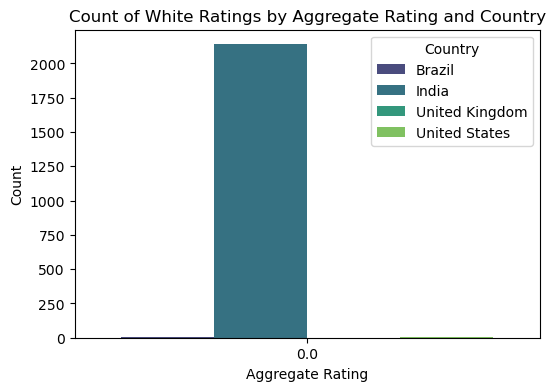

In [97]:
white_ratings_df = df[df['Rating color'] == 'White'].groupby(['Aggregate rating', 'Country']).size().reset_index(name='Count')

# Create a figure and axis
plt.figure(figsize=(6, 4))

# Bar plot using Seaborn
sns.barplot(x='Aggregate rating', y='Count', hue='Country', data=white_ratings_df, palette='viridis')

# Set the labels and title
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Count of White Ratings by Aggregate Rating and Country')

# Show the plot
plt.show()

MULTIVARIATE ANALYSIS

In [98]:
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


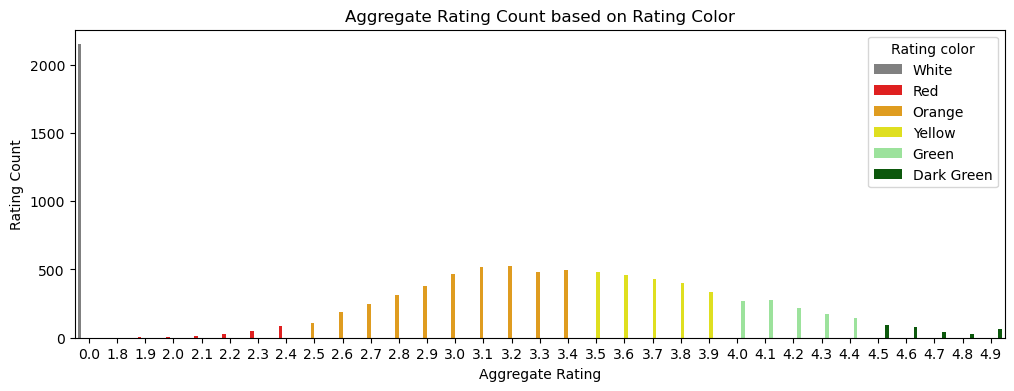

In [99]:
# Mapping rating color to a custom color palette
color_palette = {
    "Red": "red",
    "Orange": "orange",
    "Yellow": "yellow",
    "Green": "lightgreen",
    "Dark Green": "darkgreen",
    "White": "grey"
}

# Visualizing Aggregate Rating Count based on Rating Color with custom colors
plt.figure(figsize=(12, 4))
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', palette=color_palette, data=rating)
plt.title('Aggregate Rating Count based on Rating Color')
plt.xlabel('Aggregate Rating')
plt.ylabel('Rating Count')
plt.show()

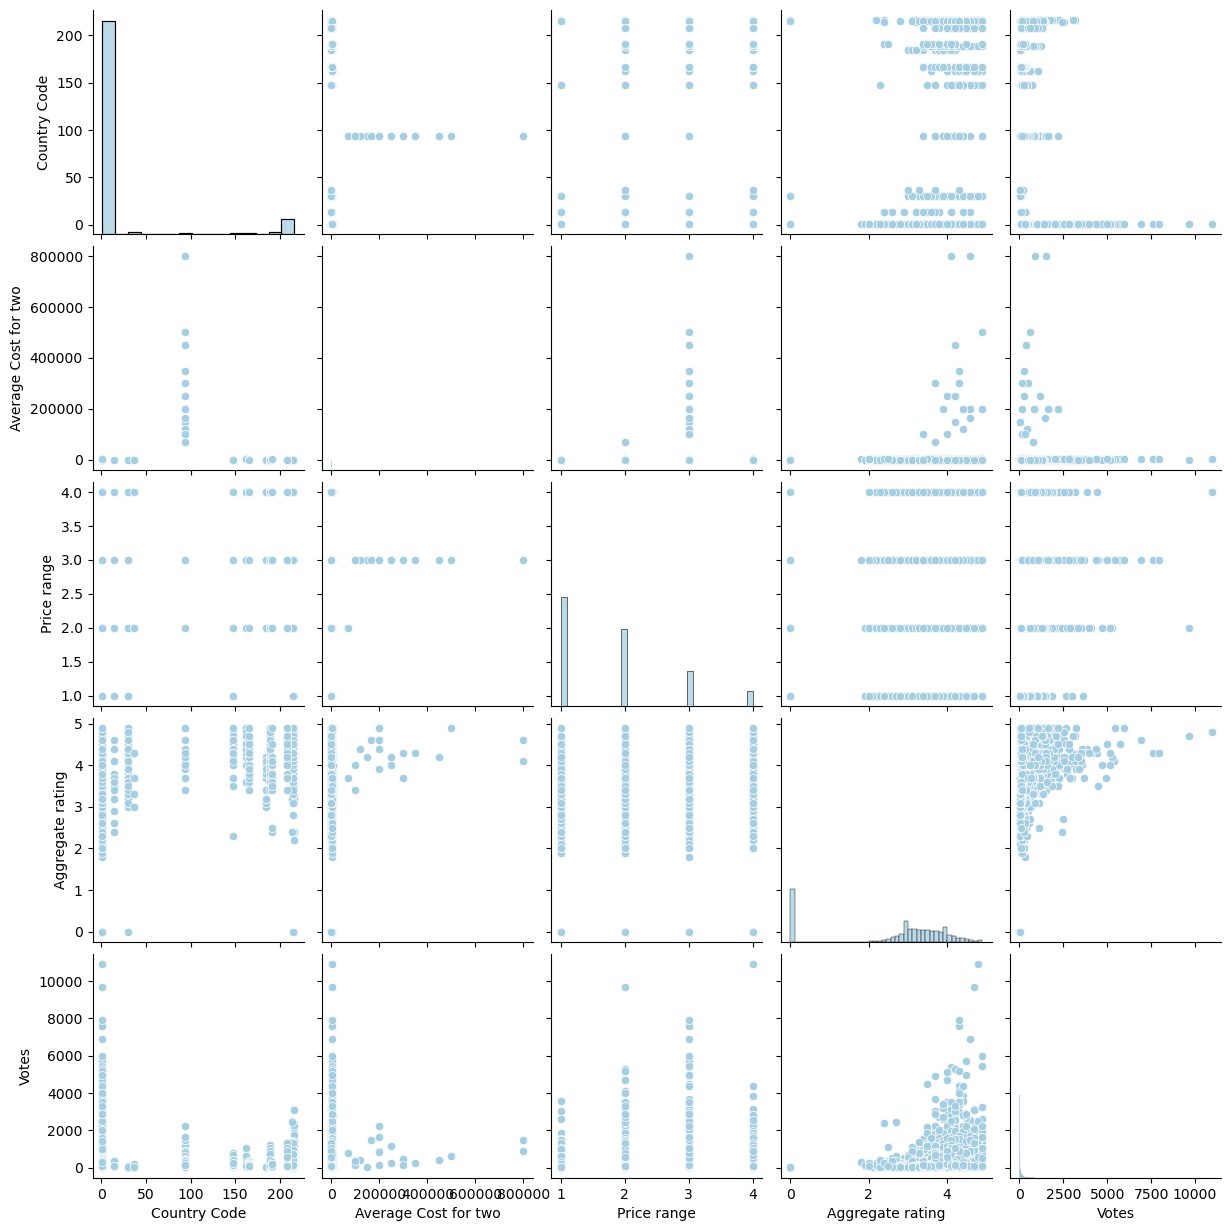

In [100]:
# Visualizing it
sns.pairplot(df)
plt.show()


# DETECTING OUTLIERS IN THE DATA

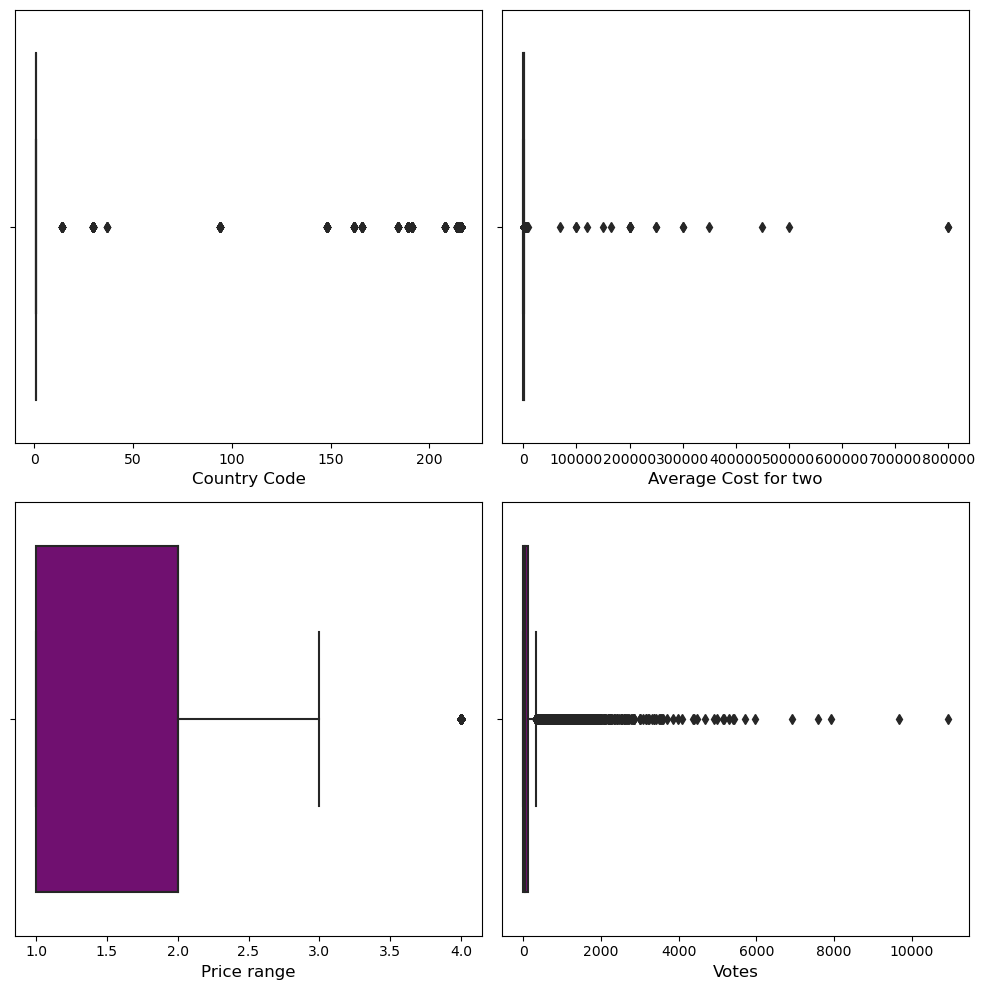

In [101]:
 # Identifying the outliers present in numerical columns using boxplot
plt.figure(figsize=(10,10))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=col, data=df,color='purple')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [102]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[numerical_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df = df[(z < 3).all(axis=1)]
df.shape

(8692, 16)

In [103]:
# checking the data loss for zscore
data_loss_zscore = (9551-8692)/9551*100
print('Dataloss using zscore:',data_loss_zscore)

Dataloss using zscore: 8.993822636373155


# SKEWNESS DETECTION

In [104]:
df.skew()

Country Code            8.892253
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                   3.642933
dtype: float64

AS THE COLUMNS CONTAINING GREATER SKEW MUST BE TREATED BUT COUNTRY CODE IS NOT REQUIRED TO BE TREATED AS IT REPRESESNTS COUNTRY AND TREATING IT WOULD BE IMPRACTICAL IN NATURE , ALSO THE COLUMN AVERAGE COST IS OUT TARGET HENSE IT MUST ALSO NOT BE TREATED.

In [105]:
# using log transformation to remove skewness from the votes
df['Votes'] = np.log1p(df['Votes'])

HERE TO REMOVE SKEWNESS WE USE LOGARITHIMIC FUNCTION AS :
Log function reduces positive skewness by compressing large values and changing the scale.
It doesn't always completely remove skewness.
Transformed data loses its original interpretation in terms of units.

In [106]:
df.skew()

Country Code            8.892253
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                  -0.059095
dtype: float64

# ENCODING CATEGORICAL COLUMNS

In [107]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3385,162,43,109,699,1100,0,1,0,0,3,4.8,0,1,5.752573,5
1,2852,162,43,413,830,1200,0,1,0,0,3,4.5,0,1,6.383507,5
2,2607,162,44,202,1327,4000,0,1,0,0,4,4.4,1,5,5.602119,5
3,4231,162,44,609,841,1500,0,0,0,0,4,4.9,0,1,5.902633,5
4,4973,162,44,609,840,1500,0,1,0,0,4,4.8,0,1,5.438079,5


THUS ALL THE CATEGORICAL COLUMN WITH OBJECT TYPE DATA TYPES ARE CONVERTED TO NUMERICAL DATA FOR OUR PREDICTION MODELS

# CORRELATION AMONGST THE COLUMN IN DATASET

In [108]:
df_corr= df.corr()
df_corr

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.004689,0.006436,0.007609,0.061902,0.051733,-0.002097,0.041382,0.031636,0.013011,0.063650,0.026526,-0.004675,0.007766,0.037262,0.004521
Country Code,0.004689,1.000000,0.009075,-0.012434,-0.044109,-0.039578,-0.134897,0.002814,-0.074618,-0.007644,0.230706,0.124475,-0.118474,0.080471,0.102145,0.610274
City,0.006436,0.009075,1.000000,-0.011575,0.010516,-0.053797,-0.089592,0.000224,-0.014553,-0.022616,-0.095979,-0.093152,0.055375,-0.044033,-0.094763,0.019376
Locality,0.007609,-0.012434,-0.011575,1.000000,-0.014245,-0.040297,0.027547,-0.068965,-0.047330,-0.010910,-0.095929,-0.147017,0.004710,0.003615,-0.173220,0.007339
Cuisines,0.061902,-0.044109,0.010516,-0.014245,1.000000,0.015331,0.050975,0.043543,-0.034442,0.005775,0.011106,-0.052195,-0.040636,-0.065656,-0.031560,0.020133
Average Cost for two,0.051733,-0.039578,-0.053797,-0.040297,0.015331,1.000000,-0.015986,0.617682,0.070133,0.010072,0.769509,0.313600,-0.022528,0.084757,0.412400,0.035699
Currency,-0.002097,-0.134897,-0.089592,0.027547,0.050975,-0.015986,1.000000,-0.028108,0.041141,0.004214,-0.112940,-0.057276,0.056877,-0.019111,-0.001382,0.326487
Has Table booking,0.041382,0.002814,0.000224,-0.068965,0.043543,0.617682,-0.028108,1.000000,0.081710,-0.017811,0.549370,0.210402,-0.017306,0.044730,0.307122,0.027328
Has Online delivery,0.031636,-0.074618,-0.014553,-0.047330,-0.034442,0.070133,0.041141,0.081710,1.000000,0.102438,0.108409,0.279767,-0.011643,-0.063904,0.364206,-0.005570
Is delivering now,0.013011,-0.007644,-0.022616,-0.010910,0.005775,0.010072,0.004214,-0.017811,0.102438,1.000000,0.017023,0.025996,-0.002022,-0.029869,0.034264,-0.000571


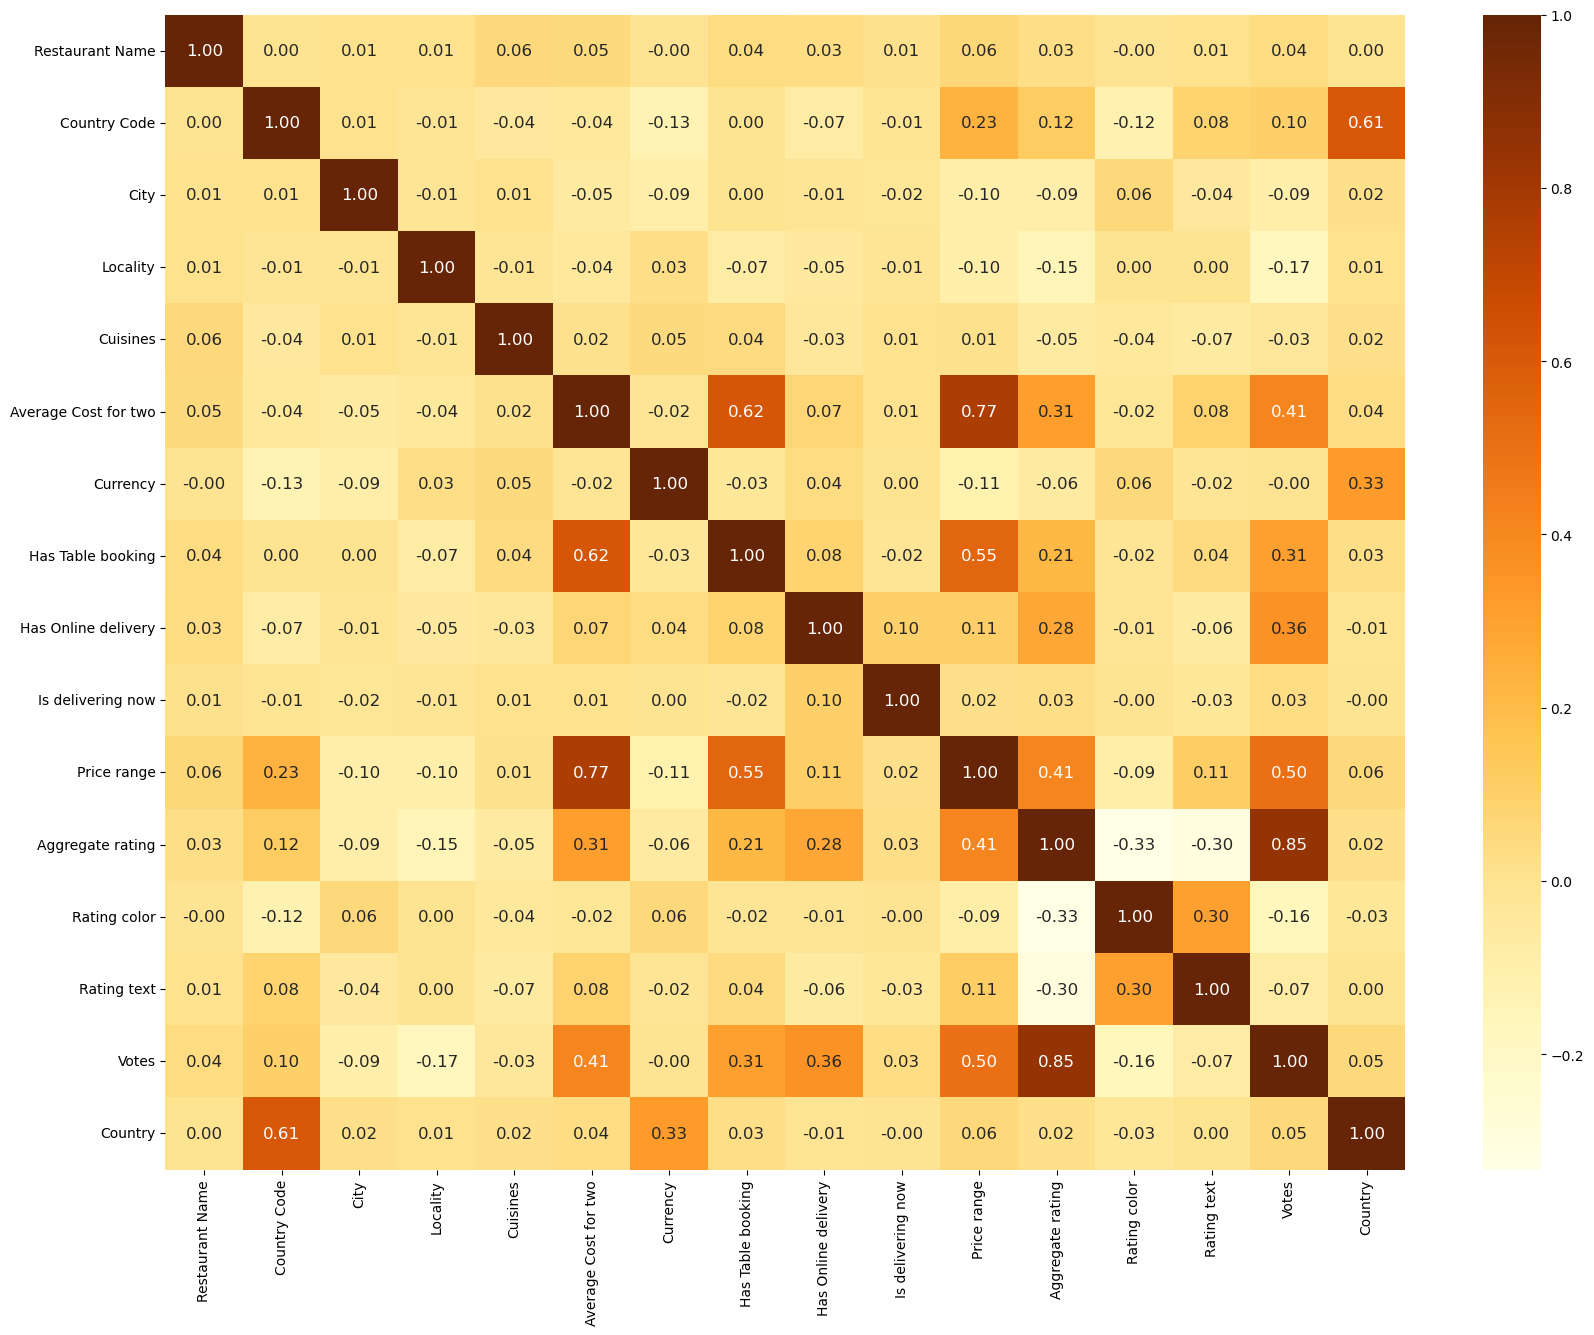

In [109]:
# Visualizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, fmt='.2F', cmap='YlOrBr', annot_kws={"size": 12})
plt.show()

In [110]:
df1= df.copy()

In [111]:
# Find the columns with the maximum correlation
max_corr = 0
max_corr_cols = []
for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) > max_corr:
            max_corr = abs(df_corr.iloc[i, j])
            max_corr_cols = [df_corr.columns[i], df_corr.columns[j]]

print(f"Columns with maximum correlation: {max_corr_cols} with correlation value of {max_corr}")

Columns with maximum correlation: ['Votes', 'Aggregate rating'] with correlation value of 0.8466712358118167


In [112]:
df.corr().abs().unstack().sort_values(ascending=False)

Restaurant Name    Restaurant Name      1.000000
Country Code       Country Code         1.000000
Votes              Votes                1.000000
Rating text        Rating text          1.000000
Rating color       Rating color         1.000000
                                          ...   
Currency           Votes                0.001382
Country            Is delivering now    0.000571
Is delivering now  Country              0.000571
Has Table booking  City                 0.000224
City               Has Table booking    0.000224
Length: 256, dtype: float64

CORRELATION FOR THE FIRST TARGET VARIABLE AVERAGE COST FOR TWO

In [113]:
#correlation with target column(Average cost for two)
correlation_with_avg = df.corr()['Average Cost for two'].abs().sort_values(ascending=False)
print(correlation_with_avg)

Average Cost for two    1.000000
Price range             0.769509
Has Table booking       0.617682
Votes                   0.412400
Aggregate rating        0.313600
Rating text             0.084757
Has Online delivery     0.070133
City                    0.053797
Restaurant Name         0.051733
Locality                0.040297
Country Code            0.039578
Country                 0.035699
Rating color            0.022528
Currency                0.015986
Cuisines                0.015331
Is delivering now       0.010072
Name: Average Cost for two, dtype: float64


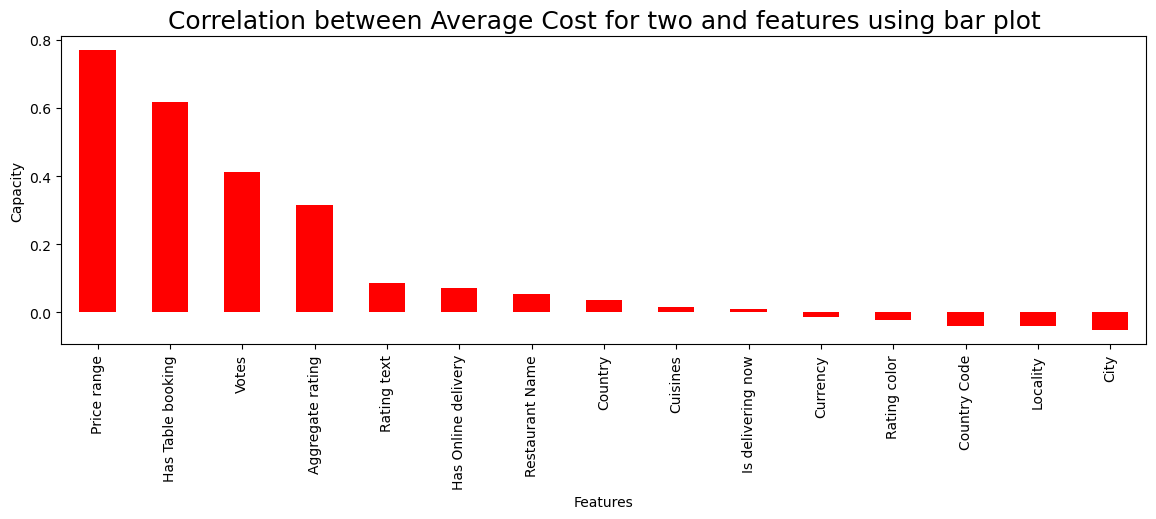

In [114]:
plt.figure(figsize=(14,4))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between Average Cost for two and features using bar plot',fontsize=18)
plt.show()

CORREALATION FOR OUR SECOND TARGET VARIABLE PRICE RANGE

In [115]:
#correlation with target column(Price range)
correlation_with_price = df.corr()['Price range'].abs().sort_values(ascending=False)
print(correlation_with_price)

Price range             1.000000
Average Cost for two    0.769509
Has Table booking       0.549370
Votes                   0.504994
Aggregate rating        0.412492
Country Code            0.230706
Currency                0.112940
Rating text             0.112770
Has Online delivery     0.108409
City                    0.095979
Locality                0.095929
Rating color            0.087040
Restaurant Name         0.063650
Country                 0.061864
Is delivering now       0.017023
Cuisines                0.011106
Name: Price range, dtype: float64


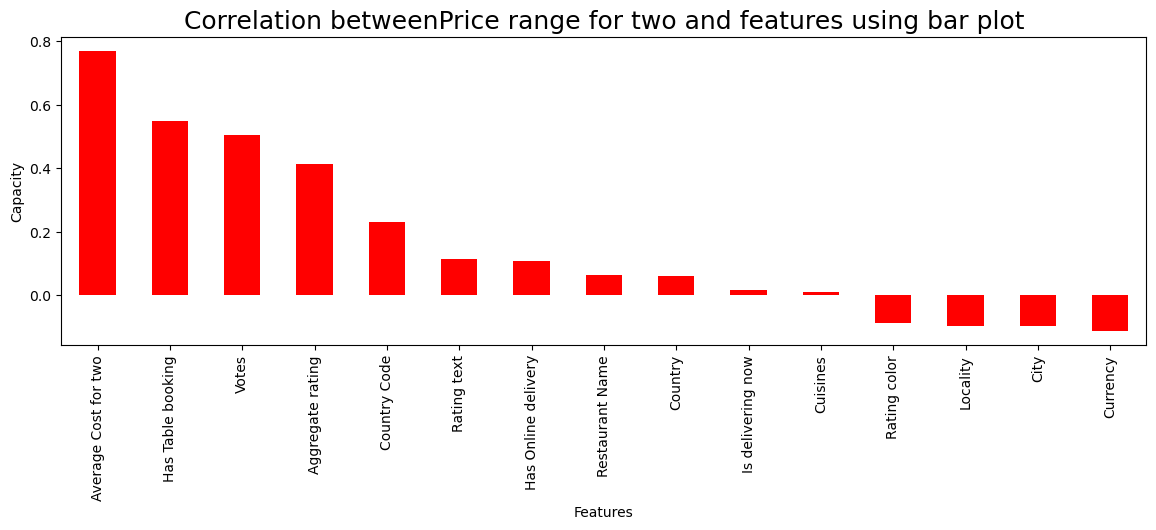

In [116]:
plt.figure(figsize=(14,4))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation betweenPrice range for two and features using bar plot',fontsize=18)
plt.show()

# DATA SPLITTING FOR TARGET VARIABLES

Data splitting for Average cost for two

In [117]:
# Splitting data in target and dependent feature
X = df.drop(['Average Cost for two'], axis =1)
Y = df['Average Cost for two']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((8692, 15), (8692,))

Data splitting for Price range

In [118]:
# Splitting data in target and dependent feature
X1 = df1.drop(['Price range'], axis =1)
Y1 = df1['Price range']

# Checking the dimenstion of X1 & Y1
X1.shape, Y1.shape

((8692, 15), (8692,))

# FEATURE ENGINEERING

STANDARDISATIION OF THE VARIABLES:

 Scaling Features for our first Traget(Average cost for two)

In [119]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
X = pd.DataFrame(X_scale, columns=X.columns)
X


,Restaurant Name,Country Code,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.052447,9.066005,-0.391504,-1.592301,-0.153817,-11.320151,2.674667,-0.611743,-0.062666,1.455358,1.504889,-2.167626,-0.404138,1.393781,5.644082
1,-0.224322,9.066005,-0.391504,-0.282572,0.161625,-11.320151,2.674667,-0.611743,-0.062666,1.455358,1.306343,-2.167626,-0.404138,1.722774,5.644082
2,-0.351542,9.066005,-0.317170,-1.191627,1.358381,-11.320151,2.674667,-0.611743,-0.062666,2.605252,1.240161,-1.455839,2.060960,1.315329,5.644082
3,0.491747,9.066005,-0.317170,0.561858,0.188113,-11.320151,-0.373878,-0.611743,-0.062666,2.605252,1.571071,-2.167626,-0.404138,1.472029,5.644082
4,0.877043,9.066005,-0.317170,0.561858,0.185705,-11.320151,2.674667,-0.611743,-0.062666,2.605252,1.504889,-2.167626,-0.404138,1.229793,5.644082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,-0.674007,9.294278,-2.101196,1.324430,-0.411469,7.658854,-0.373878,-0.611743,-0.062666,2.605252,0.909250,1.391309,0.212137,1.151675,8.470676
8688,1.655942,9.294278,-2.101196,1.410596,-0.002116,7.658854,-0.373878,-0.611743,-0.062666,2.605252,1.240161,-1.455839,2.060960,0.594384,8.470676
8689,0.848483,9.294278,-2.101196,1.436446,1.596768,7.658854,-0.373878,-0.611743,-0.062666,2.605252,1.173979,-1.455839,2.060960,0.638475,8.470676
8690,0.546270,9.294278,-2.101196,1.518304,0.000292,7.658854,-0.373878,-0.611743,-0.062666,2.605252,1.306343,-2.167626,-0.404138,0.992814,8.470676


Scaling Features for our second Traget(Price range)

In [120]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)

# Create a DataFrame view of the scaled features after preprocessing
X1 = pd.DataFrame(X_scale, columns=X1.columns)
X1

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.052447,9.066005,-0.391504,-1.592301,-0.153817,-11.320151,2.674667,-0.611743,-0.062666,1.455358,1.504889,-2.167626,-0.404138,1.393781,5.644082
1,-0.224322,9.066005,-0.391504,-0.282572,0.161625,-11.320151,2.674667,-0.611743,-0.062666,1.455358,1.306343,-2.167626,-0.404138,1.722774,5.644082
2,-0.351542,9.066005,-0.317170,-1.191627,1.358381,-11.320151,2.674667,-0.611743,-0.062666,2.605252,1.240161,-1.455839,2.060960,1.315329,5.644082
3,0.491747,9.066005,-0.317170,0.561858,0.188113,-11.320151,-0.373878,-0.611743,-0.062666,2.605252,1.571071,-2.167626,-0.404138,1.472029,5.644082
4,0.877043,9.066005,-0.317170,0.561858,0.185705,-11.320151,2.674667,-0.611743,-0.062666,2.605252,1.504889,-2.167626,-0.404138,1.229793,5.644082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,-0.674007,9.294278,-2.101196,1.324430,-0.411469,7.658854,-0.373878,-0.611743,-0.062666,2.605252,0.909250,1.391309,0.212137,1.151675,8.470676
8688,1.655942,9.294278,-2.101196,1.410596,-0.002116,7.658854,-0.373878,-0.611743,-0.062666,2.605252,1.240161,-1.455839,2.060960,0.594384,8.470676
8689,0.848483,9.294278,-2.101196,1.436446,1.596768,7.658854,-0.373878,-0.611743,-0.062666,2.605252,1.173979,-1.455839,2.060960,0.638475,8.470676
8690,0.546270,9.294278,-2.101196,1.518304,0.000292,7.658854,-0.373878,-0.611743,-0.062666,2.605252,1.306343,-2.167626,-0.404138,0.992814,8.470676


# MULTICOLLINEARITY

MULTICOLLINEARITY OF FIRST TARGET VARIABLE AVERAGE COST FOR TWO

In [121]:
vf = pd.DataFrame()
vf["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vf["Features"] = X.columns
vf

,VIF values,Features
0,1.009211,Restaurant Name
1,2.247533,Country Code
2,1.040663,City
3,1.034635,Locality
4,1.029986,Cuisines
5,1.429128,Currency
6,1.508010,Has Table booking
7,1.198962,Has Online delivery
8,1.013611,Is delivering now
9,1.974341,Price range


MULTICOLLINEARITY OF SECOND TARGET VARIABLE PRICE RANGE

In [122]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

,VIF values,Features
0,1.009211,Restaurant Name
1,2.247533,Country Code
2,1.040663,City
3,1.034635,Locality
4,1.029986,Cuisines
5,1.429128,Average Cost for two
6,1.508010,Currency
7,1.198962,Has Table booking
8,1.013611,Has Online delivery
9,1.974341,Is delivering now


# BALANCING CLASS DATA

In [123]:
Y.value_counts()

300     891
500     890
400     849
200     680
600     645
       ... 
720       1
7000      1
430       1
1050      1
160       1
Name: Average Cost for two, Length: 107, dtype: int64

In [124]:
Y1.value_counts()

1    4298
2    2855
3    1089
4     450
Name: Price range, dtype: int64

CLEARLY THERE IS A IMBALANCE IN Y1 DATA THUS IT NEEDS TO BE BALANCED BEFORE PROCEEDING TO PRICE RANGE PREDICTIONS

In [126]:
sm= SMOTE()

X1,Y1=sm.fit_resample(X1,Y1)

# Checking Value count after applying SMOTE
Y1.value_counts()

3    4298
4    4298
2    4298
1    4298
Name: Price range, dtype: int64

THE IMBALANCED DATA IS TREATED AND NOW IT IS READY TO BE PROCEED INTO MODEL TRAINING AND TESTING

# MODEL SELECTION FOR PREDICTION

SELECTING THE BEST MODEL FOR PREDICTING FIRST TARGET VARIABLE OF AVERAGE COST OF TWO

AS THIS IS A PURE REGRESSION PROBLEM OF PREDICTING AMOUNT (VALUE) OF AVERAGE COST OF TWO PEOPLE TO EAT IN A RESTAURANT. THUS ALL THE POSSIBLE REGRESSIO MODELS ARE USED TO FIND THE BEST PERFORMING

In [127]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]


In [128]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.30)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state
# Create a DataFrame to store the results
results = []



In [129]:

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df
   

,Model,Best R2 Score,Best Random State,MSE,MAE
5,RandomForest,0.883710,84,42539.678422,110.707700
9,XGBRegressor,0.877377,84,44928.120199,113.616871
7,Bagging Regressor,0.873404,82,45214.554048,109.928522
8,GradientBoostingRegressor,0.870466,14,34926.294939,115.970244
10,AdaBoostRegressor,0.820889,67,63126.806697,145.522584
3,Decision Tree,0.803957,18,100018.444508,141.147211
4,KNeighbors,0.801601,82,51498.164094,135.540886
2,Lasso,0.766635,45,69782.447161,163.016688
1,Ridge,0.766334,45,69753.961413,163.400880
0,Linear Regression,0.766318,45,69756.778610,163.420185


ABOVE ALL THE POSSIBLE REGRESSION MODELS ARE TRAINED AND TESTED ON THE DATA WHICH SHOWS THAT THAT ONLY FEWER MODELS THAT COULD ACHIVE PROPER ACCURACY

In [130]:
sorted_results_df.head(2)

,Model,Best R2 Score,Best Random State,MSE,MAE
5,RandomForest,0.883710,84,42539.678422,110.707700
9,XGBRegressor,0.877377,84,44928.120199,113.616871


TWO OF THE TOP MODELS ARE SELECTED AND THESE ARE TO BE USED FOR HYPERPARAMETER TRAINNG

# HYPERPARAMETER TRAINNG ON SELECTED MODELS

In [131]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=84, test_size=0.30)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create a RandomizedSearchCV object with parallel processing
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid,
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_RF = RandomForestRegressor(**best_params)

# Perform cross-validation to calculate the R-squared score
cv_scores = cross_val_score(best_RF, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data
best_RF.fit(train_x, train_y)

# Make predictions on the test data
y_pred_RF = best_RF.predict(test_x)

# Evaluate the best model
r2_score_RF = r2_score(test_y, y_pred_RF)
print('Best R-squared Score (Random Forest):', r2_score_RF)

mse_RF = mean_squared_error(test_y, y_pred_RF)
print('Mean Squared Error (MSE) (Random Forest):', mse_RF)

mae_RF = mean_absolute_error(test_y, y_pred_RF)
print('Mean Absolute Error (MAE) (Random Forest):', mae_RF)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores (Random Forest):', cv_scores.mean())

Best R-squared Score (Random Forest): 0.7595658642420442
Mean Squared Error (MSE) (Random Forest): 80985.0236073056
Mean Absolute Error (MAE) (Random Forest): 150.348150623967
Cross-Validated R-squared Scores (Random Forest): 0.6468535525086793


In [132]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=84, test_size=0.30)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a RandomizedSearchCV object with parallel processing
random_search = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid,
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_XGBR = XGBRegressor(**best_params)

# Perform cross-validation to calculate the R-squared score
cv_scores = cross_val_score(best_XGBR, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data
best_XGBR.fit(train_x, train_y)

# Make predictions on the test data
y_pred_XGBR = best_XGBR.predict(test_x)

# Evaluate the best model
r2_score_XGBR = r2_score(test_y, y_pred_XGBR)
print('Best R-squared Score (XGBR):', r2_score_XGBR)

mse_XGBR = mean_squared_error(test_y, y_pred_XGBR)
print('Mean Squared Error (MSE) (XGBR):', mse_XGBR)

mae_XGBR = mean_absolute_error(test_y, y_pred_XGBR)
print('Mean Absolute Error (MAE) (XGBR):', mae_XGBR)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores (XGBR):', cv_scores.mean())

Best R-squared Score (XGBR): 0.868381319598443
Mean Squared Error (MSE) (XGBR): 44332.897680606475
Mean Absolute Error (MAE) (XGBR): 116.37443874072443
Cross-Validated R-squared Scores (XGBR): 0.7387223097975343


BASED ON THE CROSS VALIDATION SCORE AFTER HYPER PARAMETER TUNNG IT IS FOUND THAT ON THE BASIS OF CROSS VALIDATION R SQUARED SCORE XGBREGRESSSOR IS THE BEST PERFORMING MODEL

# MOEDL SELECTION FOR OUR SECOND TARGET VARIABLE THAT IS PRICE RANGE 

In [133]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]

In [134]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    best_cv_score = 0

    for random_state in range(1, 101):
        X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X1, Y1, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()],
        "Cross-Validation Score": best_cv_score
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 5158.0
Confusion Matrix:
[[1241    0    0    0]
 [   0 1292    0    0]
 [   0    0 1312    0]
 [   0    0    0 1313]]
Cross-Validation Score: 0.9997091670485403
Model: Decision Tree Classifier
Best Random State: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 5158.0
Confusion Matrix:
[[1241    0    0    0]
 [   0 1292    0    0]
 [   0    0 1312    0]
 [   0    0    0 1313]]
Cross-Validation Score: 1.0
Model: K-Neighbors Classifier
Best Random State: 1
Accuracy: 0.9810003877471888
Precision: 0.9811055444655331
Recall: 0.9810003877471888
F1-Score: 0.9809969404684988
Support: 5158.0
Confusion Matrix:
[[1218   23    0    0]
 [   5 1240   45    2]
 [   0   10 1293    9]
 [   0    1    3 1309]]
Cross-Validation Score: 0.9435272710233926
Model: Random Forest Classifier
Best Random State: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 5158.0
Conf

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
0,Logistic Regression,1,1.000000,1.000000,1.000000,1.000000,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",0.999709
1,Decision Tree Classifier,1,1.000000,1.000000,1.000000,1.000000,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",1.000000
3,Random Forest Classifier,1,1.000000,1.000000,1.000000,1.000000,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",0.997150
4,ExtraTrees Classifier,1,1.000000,1.000000,1.000000,1.000000,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",0.999826
7,BaggingClassifier,1,1.000000,1.000000,1.000000,1.000000,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",1.000000
8,AdaBoostClassifier,4,1.000000,1.000000,1.000000,1.000000,5158.0,"[[[1329, 0, 0, 0], [0, 1224, 0, 0], [0, 0, 127...",0.849927
2,K-Neighbors Classifier,1,0.981000,0.981106,0.981000,0.980997,5158.0,"[[[1218, 23, 0, 0], [5, 1240, 45, 2], [0, 10, ...",0.943527
6,SGDClassifier,91,0.877084,0.879710,0.877084,0.876834,5158.0,"[[[1294, 0, 1, 0], [0, 1023, 233, 0], [0, 397,...",0.876282
5,RidgeClassifier,20,0.723149,0.745360,0.723149,0.705882,5158.0,"[[[1203, 56, 1, 0], [654, 575, 79, 0], [0, 104...",0.705097


In [135]:
model_performance_df.head(2)

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
0,Logistic Regression,1,1.0,1.0,1.0,1.0,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",0.999709
1,Decision Tree Classifier,1,1.0,1.0,1.0,1.0,5158.0,"[[[1241, 0, 0, 0], [0, 1292, 0, 0], [0, 0, 131...",1.000000


AS THE ABOVE TWO MODELS ARE BEST PERFORMING WITH EXCELLENT METRICS THEY ARE SENT FOR HYPERPARAMETER TUNING

Accuracy: 1.0


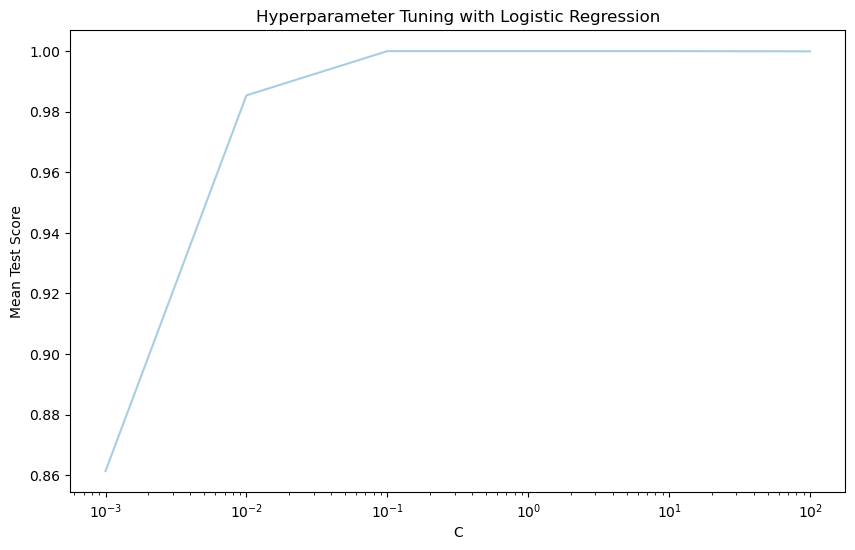

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Define the Logistic Regression model
model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Get predictions on test set
y_pred = grid_search.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot hyperparameter tuning results
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid['C'], results['mean_test_score'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning with Logistic Regression')
plt.show()

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0


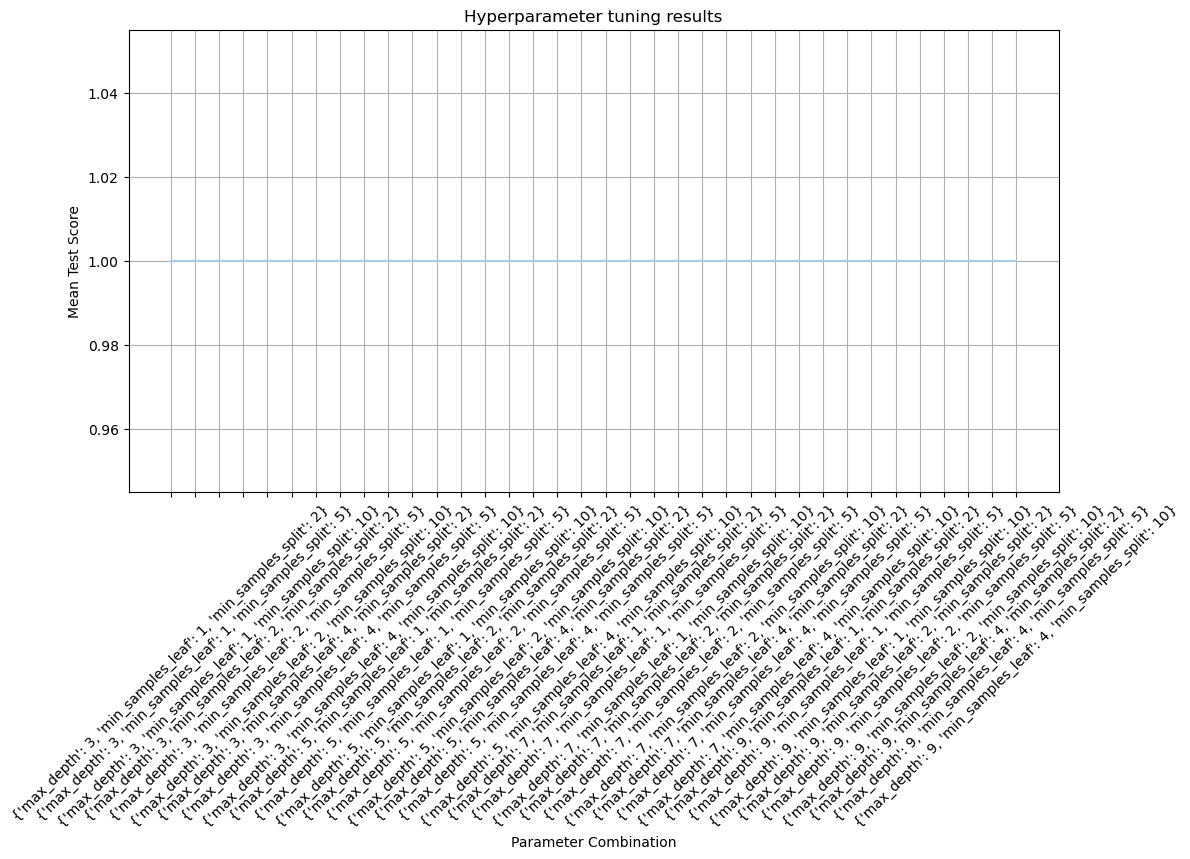

In [138]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Define the parameters grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Predict on the test data
y_pred = best_dt.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# Visualize the hyperparameter tuning results
results = grid_search.cv_results_
plt.figure(figsize=(12, 6))

plt.title("Hyperparameter tuning results")
plt.xlabel("Parameter Combination")
plt.ylabel("Mean Test Score")

# Plot the mean test scores for each parameter combination
plt.plot(range(len(results['params'])), results['mean_test_score'])
plt.xticks(range(len(results['params'])), results['params'], rotation=45)
plt.grid()

plt.show()


# SAVING THE BEST MODEL

In [139]:
import pickle

# Assuming you have already executed the previous code and have the best model in `best_dt`

# Open a file in binary write mode for saving the model
with open("best_dt_model.pkl", "wb") as f:
    pickle.dump(best_dt, f)

print("Model saved successfully to best_dt_model.pkl")


Model saved successfully to best_dt_model.pkl
